<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-12-26 01:51:09--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  76.6MB/s    in 2.6s    

2025-12-26 01:51:12 (76.6 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [5]:
!pip install pandas

In [6]:
!pip install matplotlib

In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [8]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [9]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [10]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [11]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


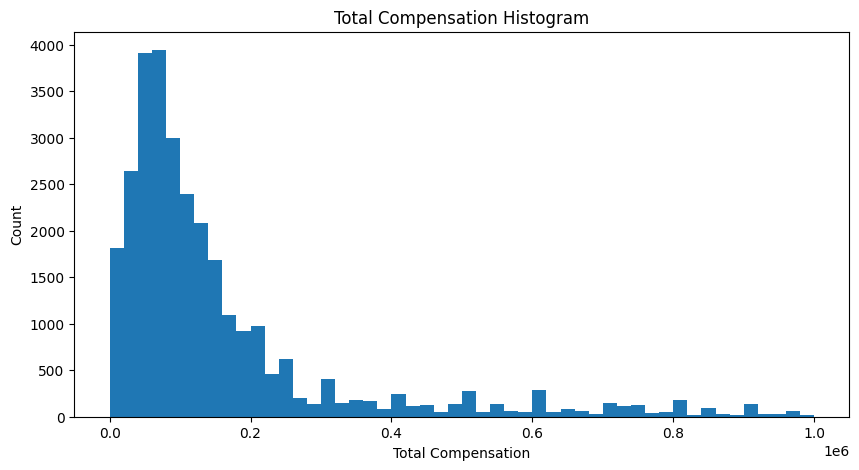

In [12]:
## Write your code here
df = pd.read_csv('survey-data.csv')
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors='coerce')
df = df[df["CompTotal"] < 1_000_000]
df = df.dropna(subset=["CompTotal"])

plt.figure(figsize=(10,5))
plt.hist(df["CompTotal"], bins=50)
plt.title("Total Compensation Histogram")
plt.xlabel("Total Compensation")
plt.ylabel("Count")
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


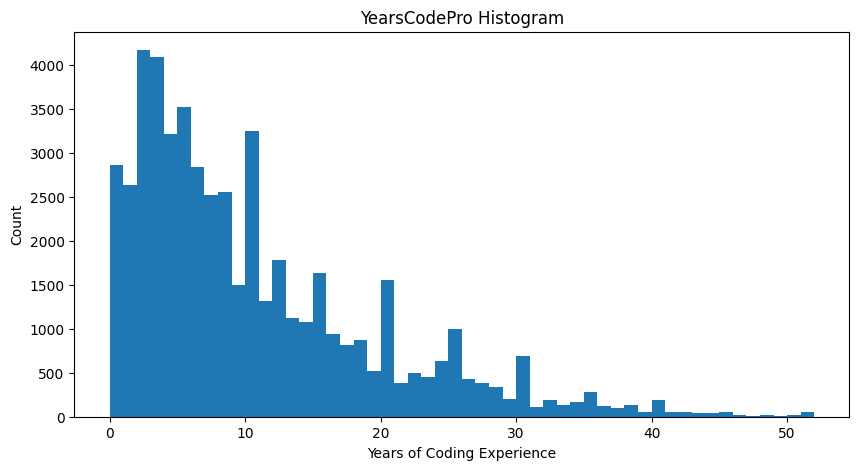

In [13]:
## Write your code here
conn = sqlite3.connect('survey-data.sqlite')
QUERY = "SELECT YearsCodePro FROM main WHERE YearsCodePro IS NOT NULL"
yearscodepro = pd.read_sql_query(QUERY, conn)
yearscodepro["YearsCodePro"] = yearscodepro["YearsCodePro"].replace({"Less than 1 year": 0, "More than 50 years": 51})
yearscodepro["YearsCodePro"] = pd.to_numeric(yearscodepro["YearsCodePro"], errors='coerce')
bins = range(int(yearscodepro['YearsCodePro'].min()), int(yearscodepro['YearsCodePro'].max()) + 2)

plt.figure(figsize=(10,5))
plt.hist(yearscodepro["YearsCodePro"], bins=bins)
plt.title("YearsCodePro Histogram")
plt.xlabel("Years of Coding Experience")
plt.ylabel("Count")
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


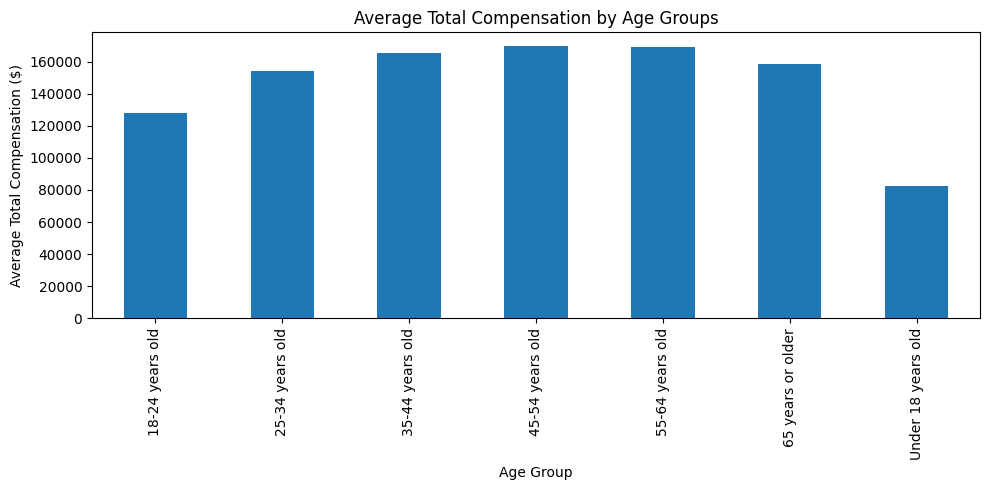

In [14]:
## Write your code here
!pip install numpy
import numpy as np

df.replace("Prefer not to say", np.nan, inplace=True)
df.dropna(subset=["Age"], inplace=True)
compbyage = df.groupby("Age")["CompTotal"].mean()

plt.figure(figsize=(10, 5))
compbyage.plot(kind='bar')
plt.xticks(rotation=90)
plt.title("Average Total Compensation by Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Average Total Compensation ($)")
plt.tight_layout()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


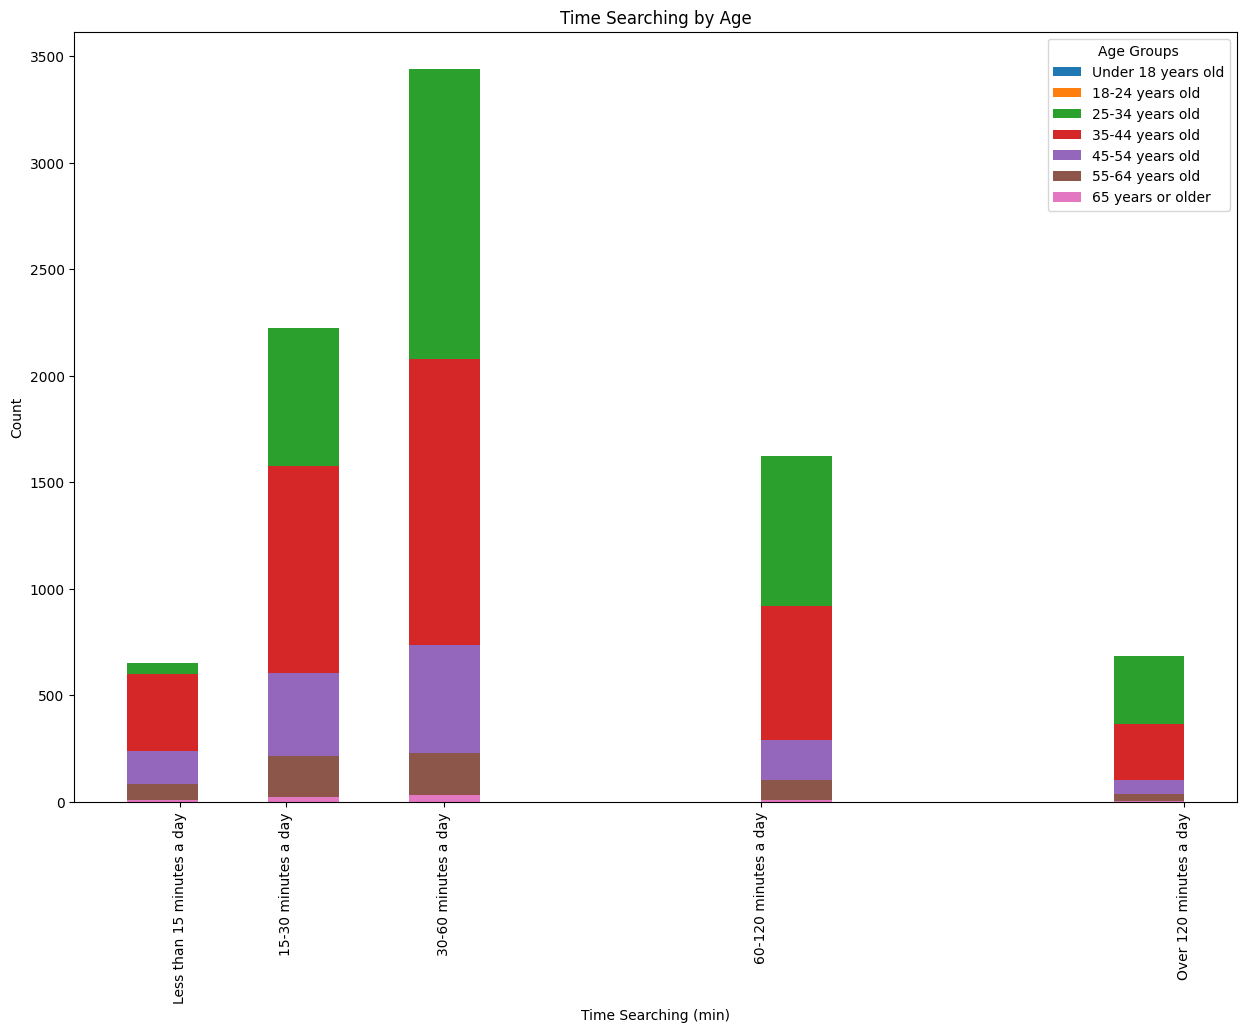

In [29]:
## Write your code here
df.dropna(subset=["TimeSearching"], inplace=True)

agemap = {
    "Under 18 years old": 18,
    "18-24 years old": (18+24)/2,
    "25-34 years old": (25+34)/2,
    "35-44 years old": (35+44)/2,
    "45-54 years old": (45+54)/2,
    "55-64 years old": (55+64)/2,
    "65 years or older": 65
}

timemap = {
    'Less than 15 minutes a day': 7.5,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150
}

df["Avg_TimeSearching"] = df["TimeSearching"].map(timemap)

plt.figure(figsize=(15, 10))
for i in agemap.keys():
    df_agemap = df[df["Age"] == i]
    plt.hist(df_agemap["Avg_TimeSearching"], bins=range(0, 160, 10), label=i)
plt.title("Time Searching by Age")
plt.xlabel("Time Searching (min)")
plt.ylabel("Count")
plt.xticks(ticks=(7.5, 22.5, 45, 90, 150), labels=timemap.keys(), rotation=90)
plt.legend(title="Age Groups")
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


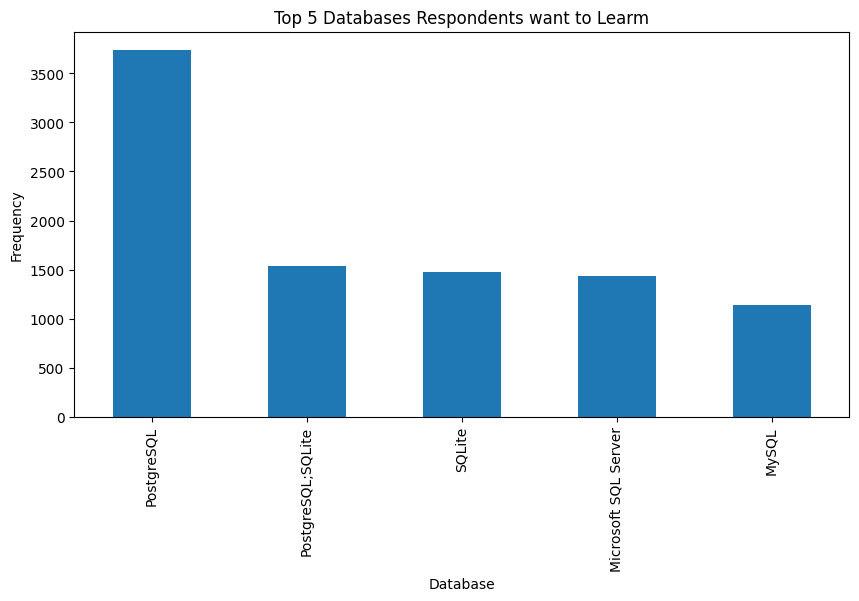

In [31]:
## Write your code here
dfog = pd.read_csv('survey-data.csv')

plt.figure(figsize=(10,5))
dfog["DatabaseWantToWorkWith"].value_counts().head(5).plot(kind='bar')
plt.title("Top 5 Databases Respondents want to Learm")
plt.xlabel("Database")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


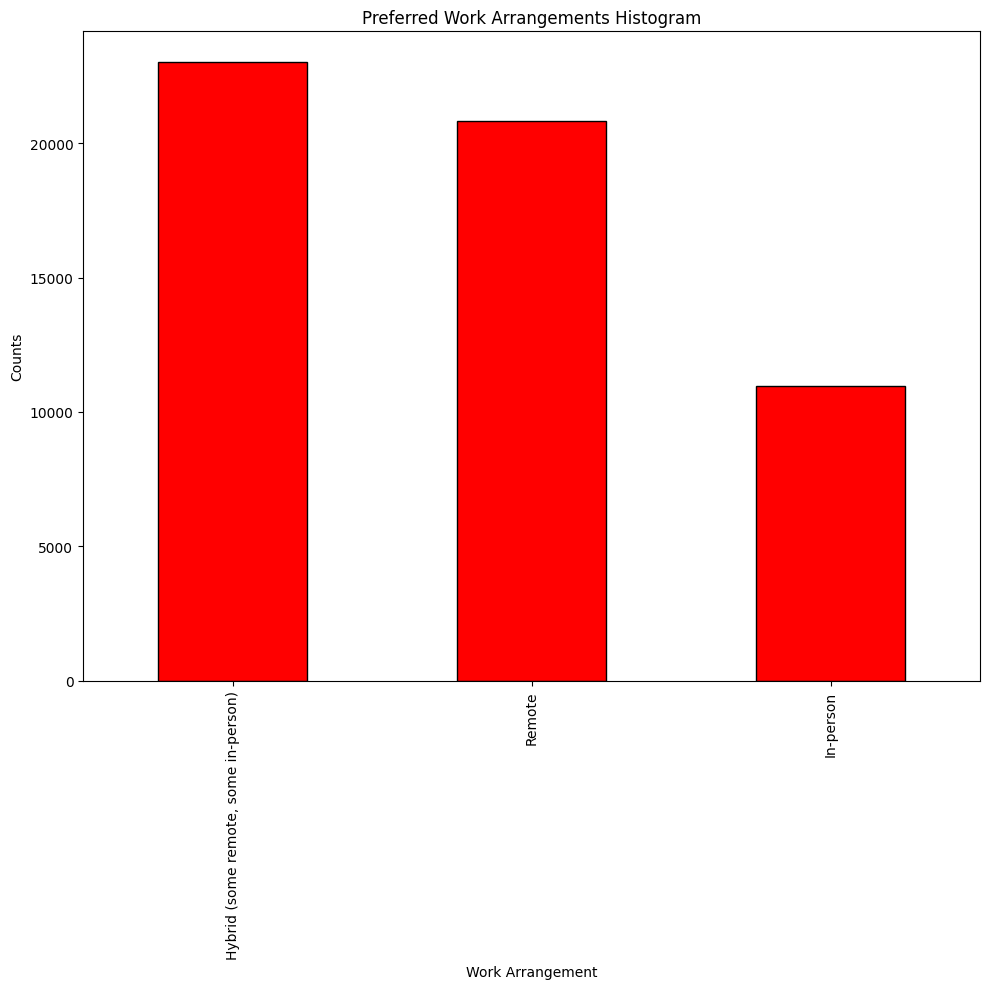

In [33]:
## Write your code here
dfog["RemoteWork"] = dfog["RemoteWork"].astype('category')

plt.figure(figsize=(10, 10))
dfog["RemoteWork"].value_counts().plot(kind='bar', color='red', edgecolor='black')
plt.title("Preferred Work Arrangements Histogram")
plt.xlabel("Work Arrangement")
plt.ylabel("Counts")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


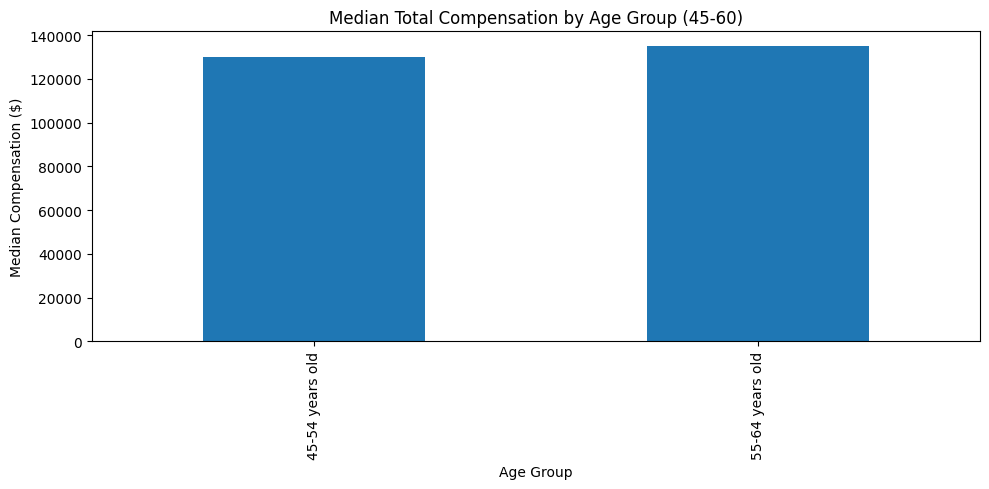

In [37]:
## Write your code here
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IN ('45-54 years old', '55-64 years old') AND CompTotal IS NOT NULL
"""
agecomp = pd.read_sql_query(QUERY, conn)
agecomp.dropna(subset=["Age"], inplace=True)

plt.figure(figsize=(10, 5))
agecomp.groupby("Age")["CompTotal"].median().plot(kind='bar')
plt.title("Median Total Compensation by Age Group (45-60)")
plt.xlabel("Age Group")
plt.ylabel("Median Compensation ($)")
plt.tight_layout()
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


/tmp/ipykernel_3393/3484455893.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfog["YearsCodePro"].fillna(dfog["YearsCodePro"].mean(), inplace=True)
/tmp/ipykernel_3393/3484455893.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfog.groupby("CodingExperience")["JobSat"].mean().plot(kind='bar')


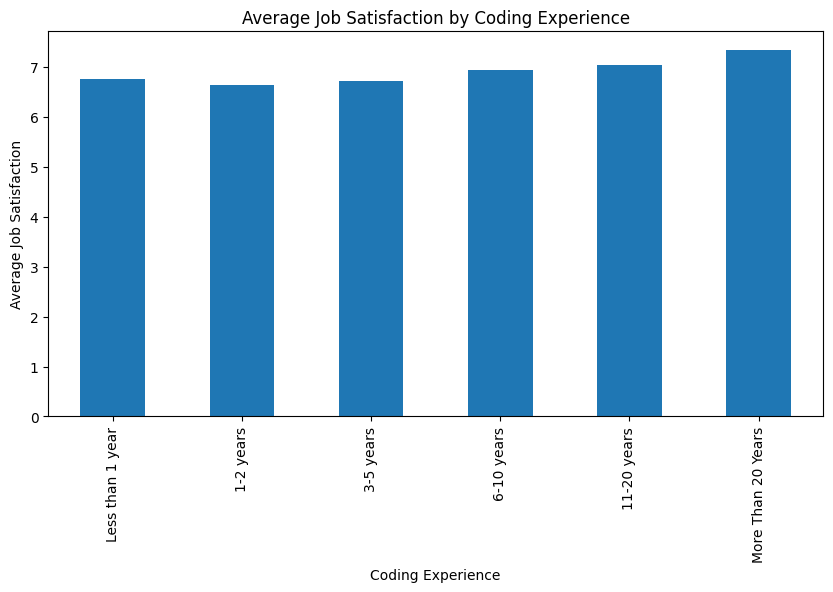

In [39]:
## Write your code here
dfog["YearsCodePro"] = dfog["YearsCodePro"].replace({"Less than 1 year": 0, "More than 50 years": 51})
dfog["YearsCodePro"] = pd.to_numeric(dfog["YearsCodePro"], errors='coerce')
dfog["YearsCodePro"].fillna(dfog["YearsCodePro"].mean(), inplace=True)
dfog["CodingExperience"] = pd.cut(dfog['YearsCodePro'],
                                  bins=[0, 1, 2, 5, 10, 20, 50] ,
                                  labels=['Less than 1 year', '1-2 years', '3-5 years', '6-10 years', '11-20 years', 'More Than 20 Years'],
                                  right=True)

plt.figure(figsize=(10, 5))
dfog.groupby("CodingExperience")["JobSat"].mean().plot(kind='bar')
plt.title("Average Job Satisfaction by Coding Experience")
plt.xlabel("Coding Experience")
plt.ylabel("Average Job Satisfaction")
plt.xticks(rotation=90)
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [40]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
